# Augmenting a dataset for object detection in YOLO

In this notebook, we illustrate how CLODSA can be employed to augment a dataset of images devoted to object detection using the [YOLO format](https://pjreddie.com/darknet/yolo/). In particular, we use a subset of the [Pascal VOC dataset](http://host.robots.ox.ac.uk/pascal/VOC/). We will use 20 images from that dataset. Such a subset can be downloaded by executing the following command. 

We can check the amount of images in each one of the folders.

In [3]:
pip install numpy --upgrade

     ---------------------------------------- 14.0/14.0 MB 1.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\hp\\anaconda3\\lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



## Augmentation techniques

In this notebook, we will use the following augmentation techniques:
- Vertical, horizontal, and vertical-horizontal flips.
- 180º Rotation.
- Average blurring.
- Raise the hue value. 

## Installing the necessary libraries

In case that CLODSA is not installed in your system, the first task consists in installing it using ``pip``.

In [ ]:
!pip install clodsa

## Loading the necessary libraries

The first step in the pipeline consists in loading the necessary libraries to apply the data augmentation techniques in CLODSA. We also load some libraries to show the results.

In [1]:
from matplotlib import pyplot as plt
from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.transformers.transformerFactory import transformerGenerator
from clodsa.techniques.techniqueFactory import createTechnique
import xml.etree.ElementTree as ET
import cv2
import os
%matplotlib inline

## Creating the augmentor object

As explained in the documentation of CLODSA, we need to specify some parameters for the augmentation process, and use them to create an augmentor object.  

_The kind of problem_. In this case, we are working in a detection problem

In [6]:
os.listdir(INPUT_PATH)

['cots_100005_png.rf.86c3d3400010ba43868d4cee69e887a2.jpg',
 'cots_100005_png.rf.86c3d3400010ba43868d4cee69e887a2.txt',
 'cots_100006_png.rf.fa824743ffd3f90df4a479e93603b829.jpg',
 'cots_100006_png.rf.fa824743ffd3f90df4a479e93603b829.txt',
 'cots_100007_png.rf.6afa1928feebcd40c451f2a07cb93fd1.jpg',
 'cots_100007_png.rf.6afa1928feebcd40c451f2a07cb93fd1.txt',
 'cots_100008_png.rf.0d3162ceef7debf8e7022dadbfe79b7c.jpg',
 'cots_100008_png.rf.0d3162ceef7debf8e7022dadbfe79b7c.txt',
 'cots_100009_png.rf.bde83ac90cd9297a01fe3230051432c4.jpg',
 'cots_100009_png.rf.bde83ac90cd9297a01fe3230051432c4.txt',
 'cots_100014_png.rf.cd410af71fd7eb0633fe235cfe8c59b5.jpg',
 'cots_100014_png.rf.cd410af71fd7eb0633fe235cfe8c59b5.txt',
 'cots_100016_png.rf.a82f3f074b91de9ce19d831297e4113d.jpg',
 'cots_100016_png.rf.a82f3f074b91de9ce19d831297e4113d.txt',
 'cots_100023_png.rf.a44645881628974c45c1f1d42163ef97.jpg',
 'cots_100023_png.rf.a44645881628974c45c1f1d42163ef97.txt',
 'cots_100024_png.rf.b91e53fcede72d436f3

_The output mode_. The generated images will be stored in a new folder called augmented_images.  

Using the above information, we can create our augmentor object. 

## Adding the augmentation techniques

Now, we define the techniques that will be applied in our augmentation process and add them to our augmentor object. To illustrate the transformations, we will use the following image of the dataset. 



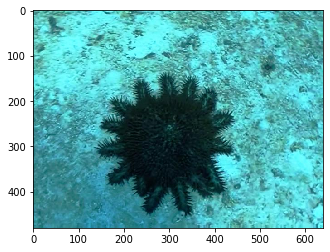

In [10]:
img = cv2.imread("D:/uOttawa/image procesing/project/train/images/cots_100005_png.rf.86c3d3400010ba43868d4cee69e887a2.jpg")
# changing to the BGR format of OpenCV to RGB format for matplotlib
plt.imshow(img[:,:,::-1])

Just for showing the results of applying data augmentation in an object detection problem, we define a function to read the annotations and another one to show them. This funcionality is not necessary when using CLODSA since it is already implemented in there. 

In [11]:
def boxesFromYOLO(imagePath,labelPath):
    image = cv2.imread(imagePath)
    (hI, wI) = image.shape[:2]
    lines = [line.rstrip('\n') for line in open(labelPath)]
    #if(len(objects)<1):
    #    raise Exception("The xml should contain at least one object")
    boxes = []
    if lines != ['']:
        for line in lines:
            components = line.split(" ")
            category = components[0]
            x  = int(float(components[1])*wI - float(components[3])*wI/2)
            y = int(float(components[2])*hI - float(components[4])*hI/2)
            h = int(float(components[4])*hI)
            w = int(float(components[3])*wI)
            boxes.append((category, (x, y, w, h)))
    return (image,boxes)

In [12]:
categoriesColors = {11: (255,0,0),14:(0,0,255)}

def showBoxes(image,boxes):
    cloneImg = image.copy()
    for box in boxes:
        if(len(box)==2):
            (category, (x, y, w, h))=box
        else:
            (category, (x, y, w, h),_)=box
        if int(category) in categoriesColors.keys():
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),categoriesColors[int(category)],5)
        else:
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),(0,255,0),5)
    plt.imshow(cloneImg[:,:,::-1])
    

Now, we show the annotation of the image.

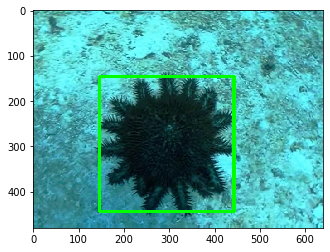

In [13]:
img,boxes = boxesFromYOLO("D:/uOttawa/image procesing/project/train/images/cots_100005_png.rf.86c3d3400010ba43868d4cee69e887a2.jpg","D:/uOttawa/image procesing/project/train/labels/cots_100005_png.rf.86c3d3400010ba43868d4cee69e887a2.txt")
showBoxes(img,boxes)

First of all, we must define a transformer generator.

In [14]:
transformer = transformerGenerator(PROBLEM)

#### Vertical flip

In [15]:
vFlip = createTechnique("flip",{"flip":0})
augmentor.addTransformer(transformer(vFlip))

Showing the result of applying the transformation.

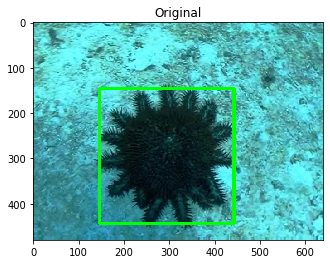

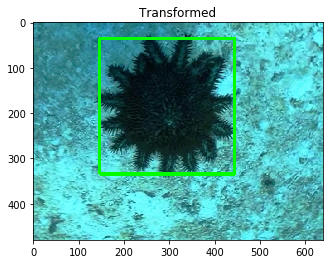

In [16]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
vFlipGenerator = transformer(vFlip)
vFlipImg,vFlipBoxes = vFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(vFlipImg,vFlipBoxes)

#### Horizontal flip

In [17]:
hFlip = createTechnique("flip",{"flip":1})
augmentor.addTransformer(transformer(hFlip))

Showing the result of applying the transformation.

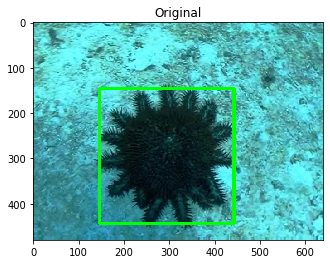

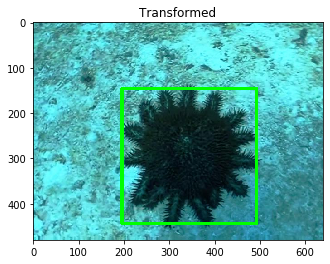

In [18]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hFlipGenerator = transformer(hFlip)
hFlipImg,hFlipBoxes = hFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hFlipImg,hFlipBoxes)

#### Horizontal and vertical flip

In [19]:
hvFlip = createTechnique("flip",{"flip":-1})
augmentor.addTransformer(transformer(hvFlip))

Showing the result of applying the transformation.

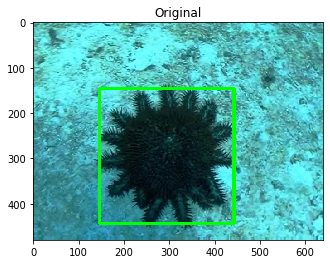

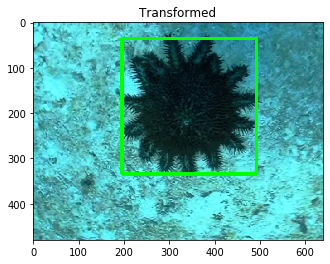

In [20]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hvFlipGenerator = transformer(hvFlip)
hvFlipImg,hvFlipBoxes = hvFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hvFlipImg,hvFlipBoxes)

#### Rotation:

In [21]:
rotate = createTechnique("rotate", {"angle" : 90})
augmentor.addTransformer(transformer(rotate))

Showing the result of applying the transformation.

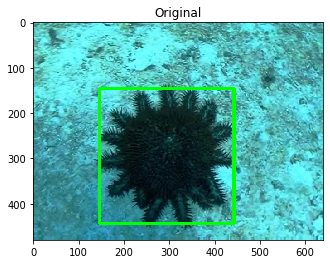

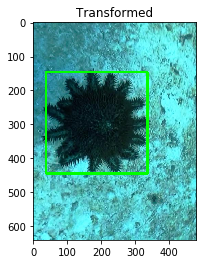

In [22]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
rotateGenerator = transformer(rotate)
rotateImg,rotateBoxes = rotateGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(rotateImg,rotateBoxes)

#### Average blurring

In [23]:
avgBlur =  createTechnique("average_blurring", {"kernel" : 5})
augmentor.addTransformer(transformer(avgBlur))

Showing the result of applying the transformation.

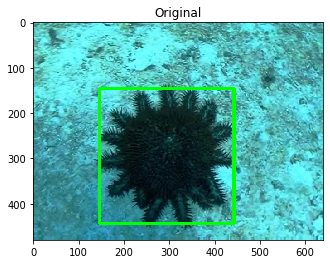

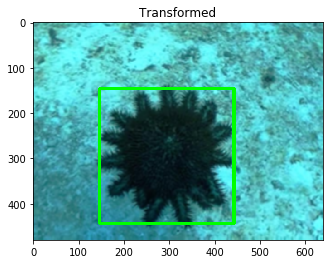

In [24]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
avgBlurGenerator = transformer(avgBlur)
avgBlurImg,avgBlurBoxes = avgBlurGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(avgBlurImg,avgBlurBoxes)

#### Raise Hue

In [25]:
hue = createTechnique("raise_hue", {"power" : 0.9})
augmentor.addTransformer(transformer(hue))

Showing the result of applying the transformation.

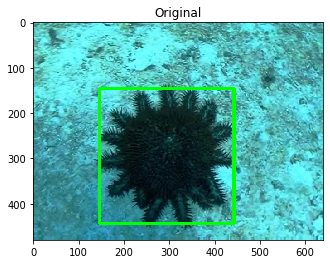

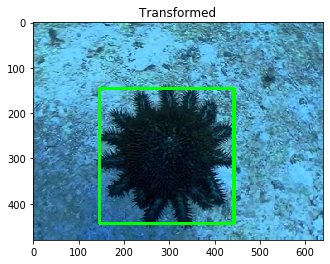

In [26]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hueGenerator = transformer(hue)
hueImg,hueBoxes = hueGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hueImg,hueBoxes)

#### None
(to keep also the original image)

In [27]:
none = createTechnique("none",{})
augmentor.addTransformer(transformer(none))

## Applying the augmentation process

Finally, we apply the augmentation process (this might take some time depending on the number of images of the original dataset and the number of transformations that will be applied). 

In [38]:
def apply_augmentation(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,GENERATION_MODE,INPUT_PATH,OUTPUT_PATH):
    augmentor = createAugmentor(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,GENERATION_MODE,INPUT_PATH,{"outputPath":OUTPUT_PATH})
    transformer = transformerGenerator(PROBLEM)
    vFlip = createTechnique("flip",{"flip":0})
    augmentor.addTransformer(transformer(vFlip))
    hFlip = createTechnique("flip",{"flip":1})
    augmentor.addTransformer(transformer(hFlip))
    hvFlip = createTechnique("flip",{"flip":-1})
    augmentor.addTransformer(transformer(hvFlip))
    rotate = createTechnique("rotate", {"angle" : 90})
    augmentor.addTransformer(transformer(rotate))
    avgBlur =  createTechnique("average_blurring", {"kernel" : 5})
    augmentor.addTransformer(transformer(avgBlur))
    hue = createTechnique("raise_hue", {"power" : 0.9})
    augmentor.addTransformer(transformer(hue))
    none = createTechnique("none",{})
    augmentor.addTransformer(transformer(none))
    augmentor.applyAugmentation()

In [ ]:
PROBLEM = "detection"
ANNOTATION_MODE = "yolo"
INPUT_PATH = "D:/uOttawa/image procesing/project/train/annotated_images"
GENERATION_MODE = "linear"
OUTPUT_MODE = "yolo"
OUTPUT_PATH= "D:/uOttawa/image procesing/project/train/augmented_images_yolo"

In [39]:
apply_augmentation(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,GENERATION_MODE,INPUT_PATH,OUTPUT_PATH2)